Learning with Deeplizard :  Neural Network Programming - Deep Learning with PyTorch
https://deeplizard.com/

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
#download fashionMNIST


train_set = torchvision.datasets.FashionMNIST(
    root='./data'
    ,train=True
    ,download=True
    ,transform=transforms.Compose([
        transforms.ToTensor()
    ])
)

In [5]:
#load the data

train_loader = torch.utils.data.DataLoader(train_set
    ,batch_size=10
    ,shuffle=True
)

print(len(train_set))
print(train_set.targets)
print(train_set.targets.bincount())


60000
tensor([9, 0, 0,  ..., 3, 0, 5])
tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


In [6]:
#accessing data


sample = next(iter(train_set))
len(sample)

image, label = sample
print(type(image),type(label))
print( image.shape,torch.tensor(label).shape,image.squeeze().shape)


<class 'torch.Tensor'> <class 'int'>
torch.Size([1, 28, 28]) torch.Size([]) torch.Size([28, 28])


tensor(9)


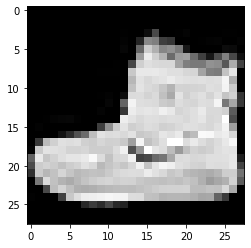

In [7]:
#visalizing data

import numpy as np
import matplotlib.pyplot as plt

plt.imshow(image.squeeze(), cmap="gray")
print(torch.tensor(label))

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([])
labels: tensor([4, 6, 6, 6, 0, 1, 0, 8, 1, 3])


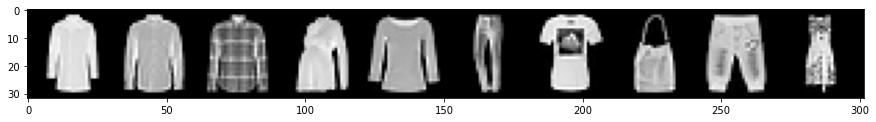

In [8]:
batch = next(iter(train_loader))
images, labels = batch

print('types:', type(images), type(labels))
print('shapes:', images.shape, torch.tensor(label).shape)

grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('labels:', labels)

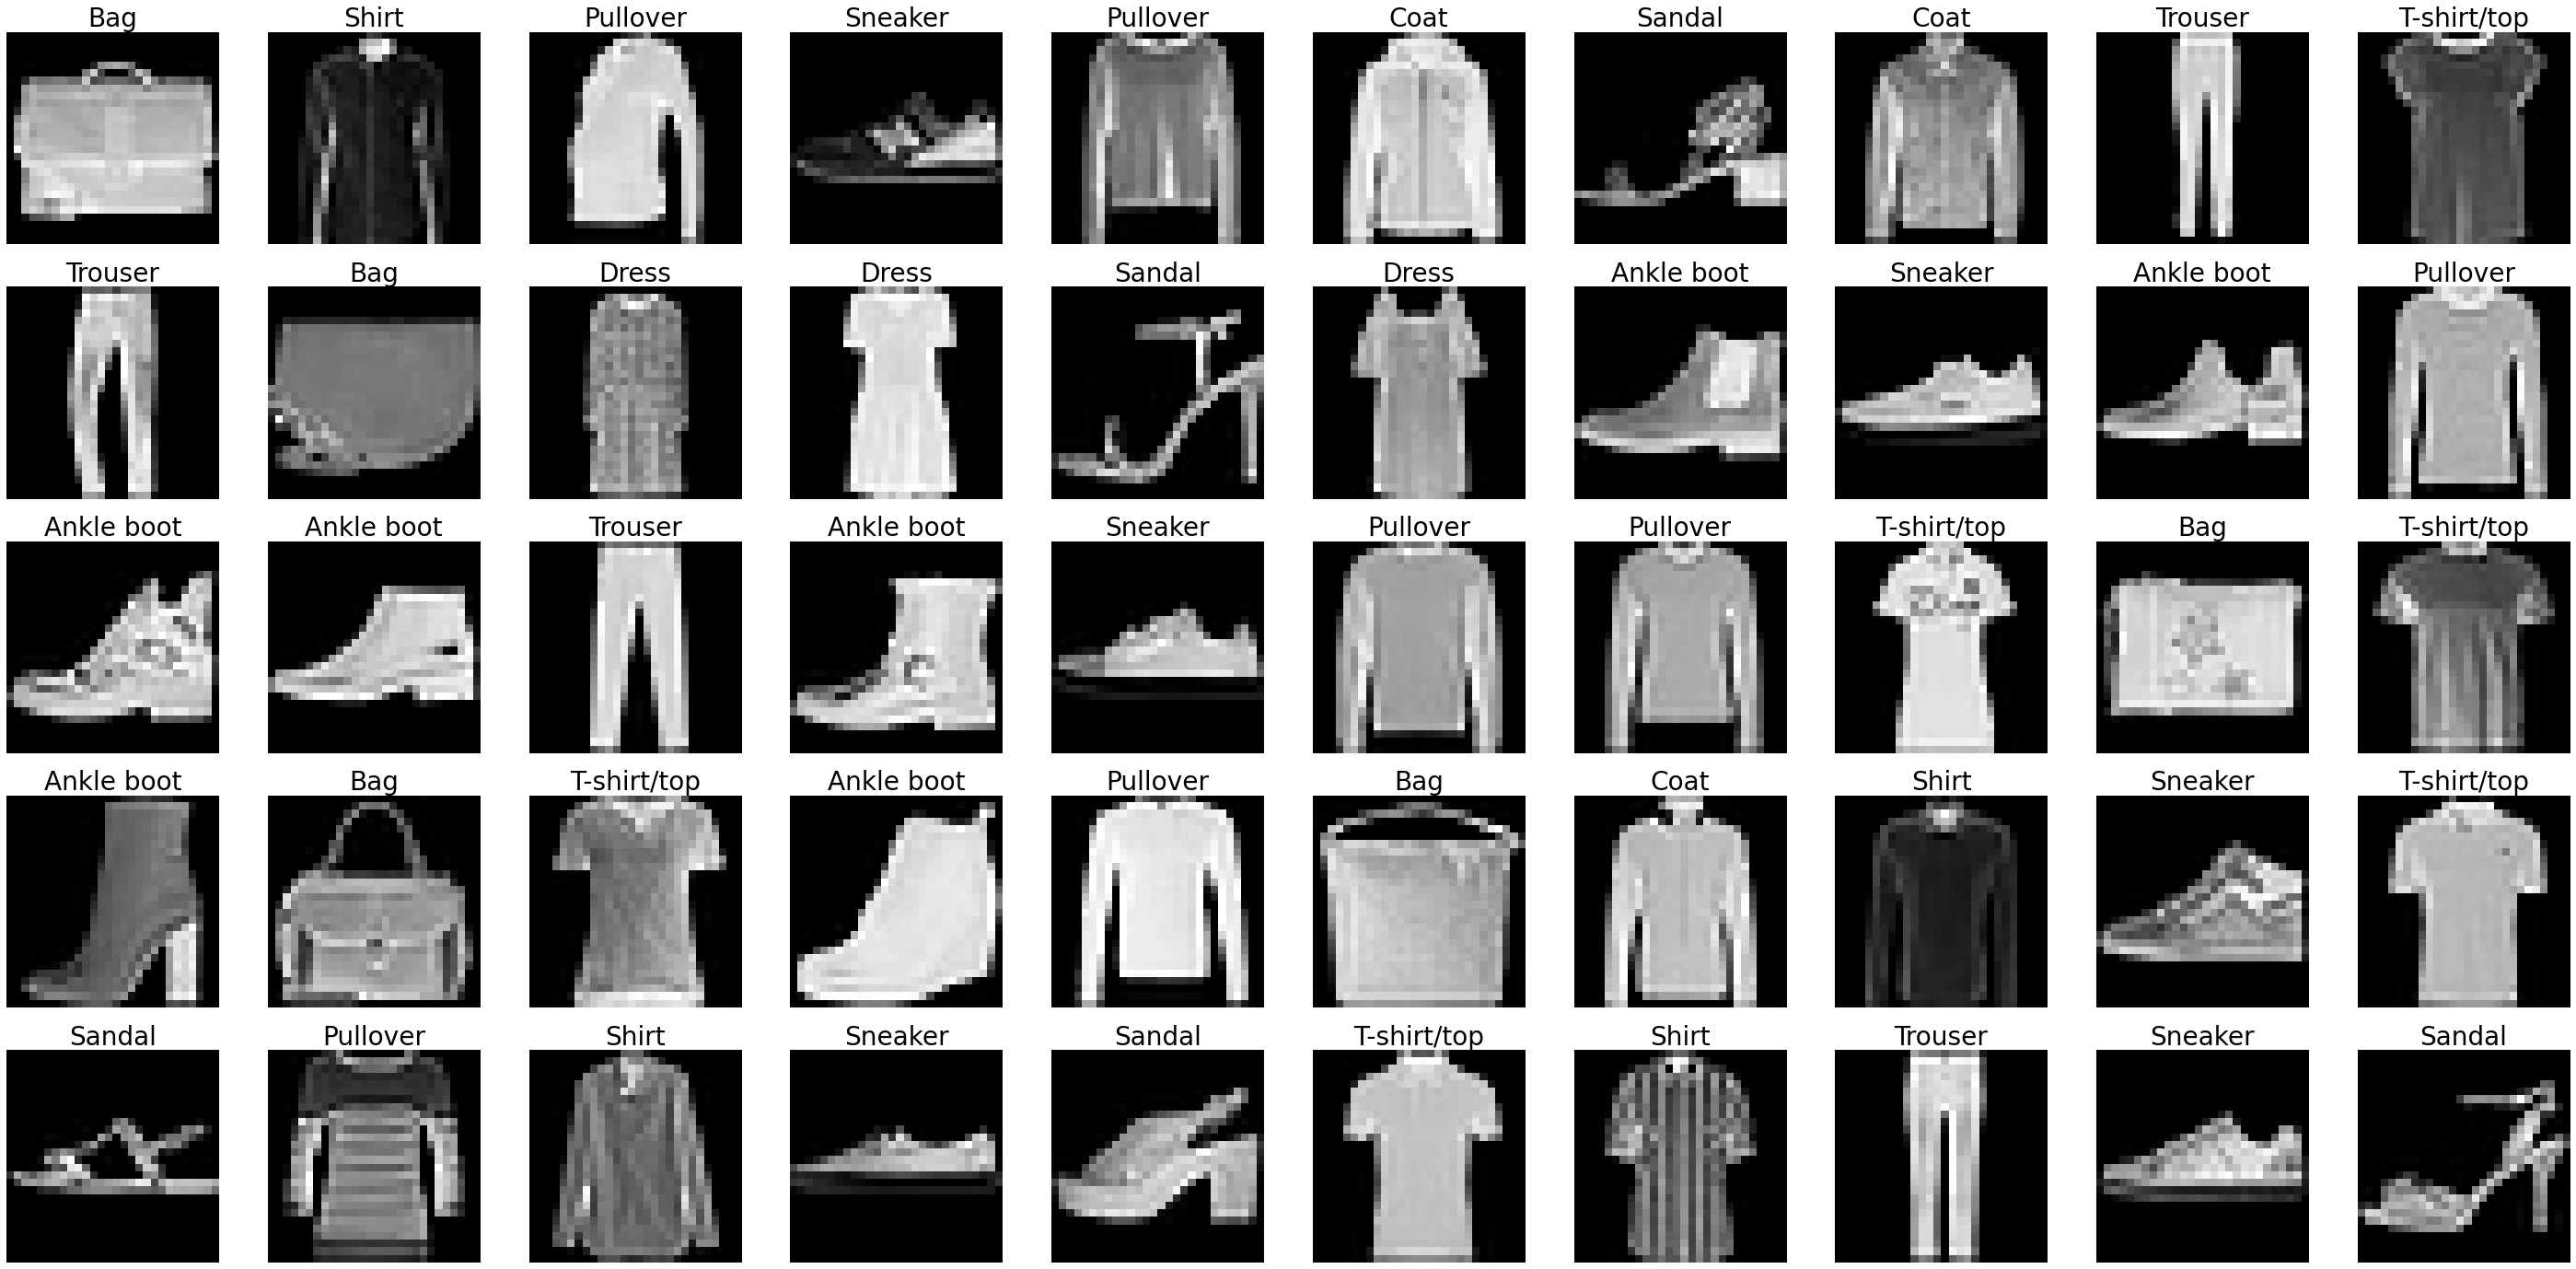

In [9]:
# plot a batch 

how_many_to_plot = 50

train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=1, shuffle=True
)

plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10,10,i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot): break
plt.show()



In [10]:
class Network(nn.Module): # line 1
    def __init__(self):
        super().__init__() # line 3
        self.layer = None

    def forward(self, t):
        t = self.layer(t)
        return t

In [11]:
#model
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)

        self.fc1 = nn.Linear(in_features=12 * 4 * 4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
            
    def forward(self, t):
        # (1) input layer
        t = t

        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)

        # (4) hidden linear layer
        t = t.reshape(-1, 12 * 4 * 4)
        t = self.fc1(t)
        t = F.relu(t)

        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)

        # (6) output layer
        t = self.out(t)
        #t = F.softmax(t, dim=1)

        return t   

In [12]:
network = Network()
network

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [13]:
#torch.set_grad_enabled(True) 

In [14]:
#Passing a single image to the network 

sample = next(iter(train_set)) 
image, label = sample 
print(image.shape)

# Inserts an additional dimension that represents a batch of size 1
image = image.unsqueeze(0)
print(image.shape)

pred = network(image) # image shape needs to be (batch_size × in_channels × H × W)

print(pred, pred.shape)
print("label :", label)
print(pred.argmax(dim=1))

torch.Size([1, 28, 28])
torch.Size([1, 1, 28, 28])
tensor([[ 0.0539, -0.0498,  0.1074, -0.0992, -0.0249,  0.1188, -0.1372, -0.0086,
         -0.0984,  0.1153]], grad_fn=<AddmmBackward>) torch.Size([1, 10])
label : 9
tensor([5])


In [15]:
# Passing a Batch of Images to the Network 

preds = network(images)
print(preds.shape)
print(preds.argmax(dim=1))
print(labels)
print(preds.argmax(dim=1).eq(labels))
print(preds.argmax(dim=1).eq(labels).sum())

torch.Size([10, 10])
tensor([5, 9, 9, 5, 9, 9, 5, 9, 5, 9])
tensor([4, 6, 6, 6, 0, 1, 0, 8, 1, 3])
tensor([False, False, False, False, False, False, False, False, False, False])
tensor(0)


In [16]:
#getting corret number of predictions
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

get_num_correct(preds, labels)

0

In [17]:
#calculating loss
loss = F.cross_entropy(preds, labels) # Calculating the loss
print(loss.item())
print(get_num_correct(preds, labels))

#calculate the gradient
loss.backward() # Calculating the gradients

#Updating the Weights 
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)
optimizer.step() # Updating the weights

#passing again
preds = network(images)
loss = F.cross_entropy(preds, labels) # Calculating the loss
print(loss.item())
print(get_num_correct(preds, labels))

2.36368989944458
0
2.303821086883545
2


In [18]:
#Train using a single batch

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader)) # Get Batch
images, labels = batch

preds = network(images) # Pass Batch
loss = F.cross_entropy(preds, labels) # Calculate Loss

loss.backward() # Calculate Gradients
optimizer.step() # Update Weights

print('loss1:', loss.item())
preds = network(images)
loss = F.cross_entropy(preds, labels)
print('loss2:', loss.item())

loss1: 2.2958385944366455
loss2: 2.2625772953033447


In [19]:
#Training with all batches (single epoch) 

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

total_loss = 0
total_correct = 0

for batch in train_loader: # Get Batch
    images, labels = batch 

    preds = network(images) # Pass Batch
    loss = F.cross_entropy(preds, labels) # Calculate Loss

    optimizer.zero_grad()
    loss.backward() # Calculate Gradients
    optimizer.step() # Update Weights

    total_loss += loss.item()
    total_correct += get_num_correct(preds, labels)

print(
    "epoch:", 0, 
    "total_correct:", total_correct, 
    "loss:", total_loss
)

epoch: 0 total_correct: 45577 loss: 376.40865671634674


In [20]:
#Training with all batches, multiple epochs 

train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

for epoch in range(10):
    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    print(
        "epoch:", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

epoch: 0 total_correct: 50547 loss: 255.69799479842186
epoch: 1 total_correct: 51673 loss: 227.98926350474358
epoch: 2 total_correct: 52066 loss: 216.68377605080605
epoch: 3 total_correct: 52287 loss: 207.84344819188118
epoch: 4 total_correct: 52569 loss: 203.50827859342098
epoch: 5 total_correct: 52663 loss: 198.770474717021
epoch: 6 total_correct: 52693 loss: 198.52525602281094
epoch: 7 total_correct: 52858 loss: 193.09157992899418
epoch: 8 total_correct: 52979 loss: 191.70900171995163
epoch: 9 total_correct: 53086 loss: 188.81890730559826


In [21]:
#function to get all predictions in a prediction tensor

@torch.no_grad()
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    for batch in loader:
        images, labels = batch

        preds = model(images)
        all_preds = torch.cat(
            (all_preds, preds)
            ,dim=0
        )
    return all_preds

In [22]:
# using 'with'

with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

preds_correct = get_num_correct(train_preds, train_set.targets)

print('total correct:', preds_correct)
print('accuracy:', preds_correct / len(train_set))
    

total correct: 52576
accuracy: 0.8762666666666666


In [23]:
#confusion_matrix

cm = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))
print(type(cm))
print(cm)

<class 'numpy.ndarray'>
[[5427   82   89  118   19    2  212    0   51    0]
 [   7 5923    3   50    8    0    5    0    4    0]
 [  66   19 4322   32 1222    0  291    0   47    1]
 [ 193  245   22 5160  267    0  103    0   10    0]
 [  21   30  136  132 5514    0  145    0   22    0]
 [   0    2    1    4    0 5825    0   82   10   76]
 [1281   99  469   98  957    0 2996    0  100    0]
 [   0    0    0    1    0   67    0 5781    5  146]
 [  19   10   23   23   19   13   48    7 5838    0]
 [   0    0    0    1    0   15    0  189    5 5790]]


In [27]:
#TensorBoard: TensorFlow's Visualization Toolkit 

!pip install tensorboard
!tensorboard --version


TensorFlow installation not found - running with reduced feature set.
2.4.1


In [28]:
from torch.utils.tensorboard import SummaryWriter

tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb.add_image('images', grid)
tb.add_graph(network, images)
tb.close()

In [33]:


network = Network()
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = torch.optim.Adam(network.parameters(), lr=0.01)

images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

tb = SummaryWriter()
tb.add_image('images', grid)
tb.add_graph(network, images)

for epoch in range(1):

    total_loss = 0
    total_correct = 0

    for batch in train_loader: # Get Batch
        images, labels = batch 

        preds = network(images) # Pass Batch
        loss = F.cross_entropy(preds, labels) # Calculate Loss

        optimizer.zero_grad()
        loss.backward() # Calculate Gradients
        optimizer.step() # Update Weights

        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    tb.add_scalar('Loss', total_loss, epoch)
    tb.add_scalar('Number Correct', total_correct, epoch)
    tb.add_scalar('Accuracy', total_correct / len(train_set), epoch)

    tb.add_histogram('conv1.bias', network.conv1.bias, epoch)
    tb.add_histogram('conv1.weight', network.conv1.weight, epoch)
    tb.add_histogram(
        'conv1.weight.grad'
        ,network.conv1.weight.grad
        ,epoch
    )

    print(
        "epoch", epoch, 
        "total_correct:", total_correct, 
        "loss:", total_loss
    )

tb.close()

epoch 0 total_correct: 47299 loss: 338.740663677454
